In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import segmentation_models_pytorch as smp

from src.datasets.AerialDroneSemanticSegmentationDataset import (
    AerialDroneSemanticSegmentationDataset,
)

In [69]:
AERIAL_DRONE_DATASET_PATH = (
    "data/AerialDroneSemanticSegmentationDataset/dataset/semantic_drone_dataset"
)

In [70]:
example_dataset = AerialDroneSemanticSegmentationDataset(AERIAL_DRONE_DATASET_PATH)
print(len(example_dataset))

72


In [71]:
example_loader = DataLoader(example_dataset, batch_size=1, shuffle=True)

In [72]:
for images, masks in example_loader:
    print(images.shape)
    print(masks.shape)
    break

torch.Size([1, 3, 544, 512])
torch.Size([1, 1, 544, 512])


In [73]:
to_pil_transform = transforms.ToPILImage()
img = to_pil_transform(images.squeeze())

In [74]:
# img.show()

In [75]:
msk = to_pil_transform(masks.squeeze())

In [76]:
# msk.show()

In [77]:
model = smp.Unet(
    encoder_name="resnet34",  # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",  # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=6,  # model output channels (number of classes in your dataset)
)

In [78]:
import numpy as np

model.eval()

with torch.no_grad():
    for images, masks in example_loader:

        height = images.shape[2]
        width = images.shape[3]

        if height % 32 == 0 and width % 32 == 0:
            print("Height and width are divisible by 32")
        else:
            print("Height and width are not divisible by 32")

        output = model(images)
        output = torch.softmax(output, dim=1)
        class_output = torch.argmax(output, dim=1)

        print("output")
        print(type(output))
        print(output.shape)
        print(output.max())
        print(output.min())
        print()
        print("masks")
        print(type(masks))
        print(masks.shape)
        print(masks.max())
        print(masks.min())

        images = to_pil_transform(images.squeeze())
        # images.show()
        images_array = np.array(images)

        # Show the images using matplotlib
        # plt.imshow(images_array, cmap='gray')
        # plt.axis('off')

        # output = to_pil_transform(output.squeeze())
        # output.show()
        output_array = np.array(output.squeeze())

        # Show the output using matplotlib
        # plt.figure()
        # plt.imshow(output_array, cmap='gray')
        # plt.axis('off')
        # plt.show()

        class_output_array = np.array(class_output.squeeze())

        masks = to_pil_transform(masks.squeeze())
        # masks.show()
        # Convert the PIL Image to a numpy array
        mask_array = np.array(msk)

        # Show the mask using matplotlib
        # plt.imshow(mask_array, cmap='gray')
        # plt.axis('off')
        # plt.show()

        # tp, fp, fn, tn = smp.metrics.get_stats(
        #     output, masks, mode="multilabel", threshold=0.5
        # )
        # print(f"TP: {tp}")
        # print(f"FP: {fp}")
        # print(f"TN: {tn}")
        # print(f"FN: {fn}")

        # iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
        # print(f"IoU score: {iou_score}")

        break

Height and width are divisible by 32
output
<class 'torch.Tensor'>
torch.Size([1, 6, 1504, 2176])
tensor(0.5144)
tensor(0.0453)

masks
<class 'torch.Tensor'>
torch.Size([1, 3, 1504, 2176])
tensor(0.9961)
tensor(0.)


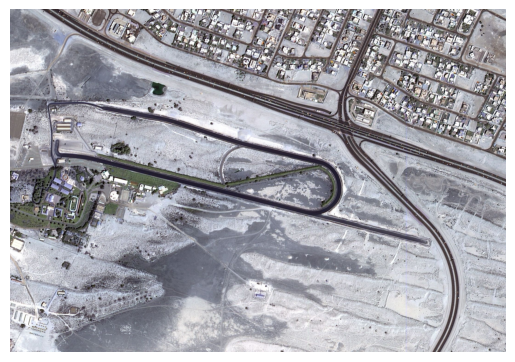

In [79]:
plt.imshow(images_array, cmap="gray")
plt.axis("off")
plt.show()

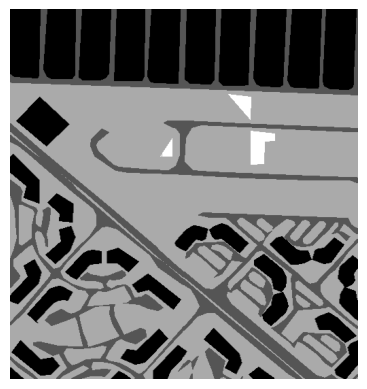

In [80]:
plt.imshow(mask_array, cmap="gray")
plt.axis("off")
plt.show()

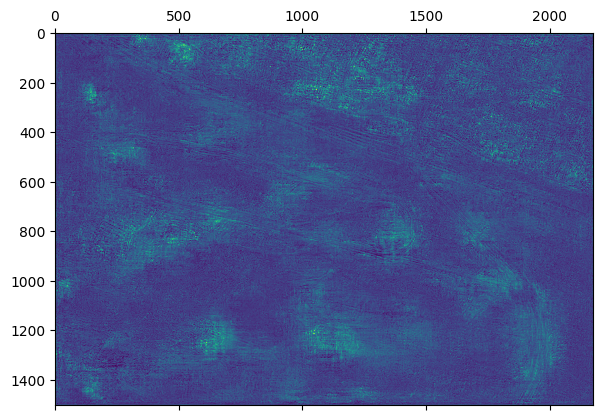

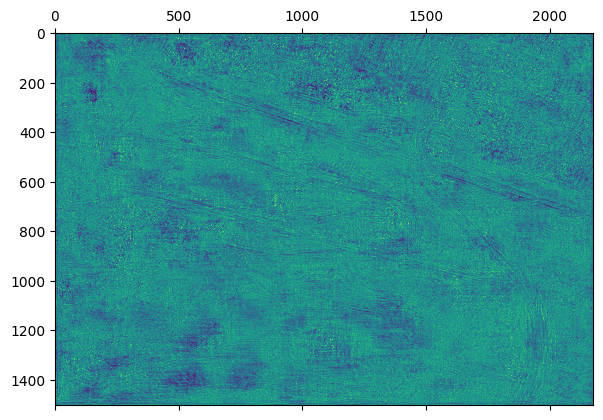

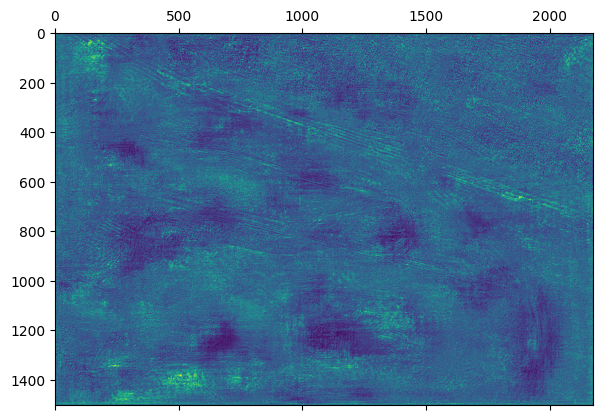

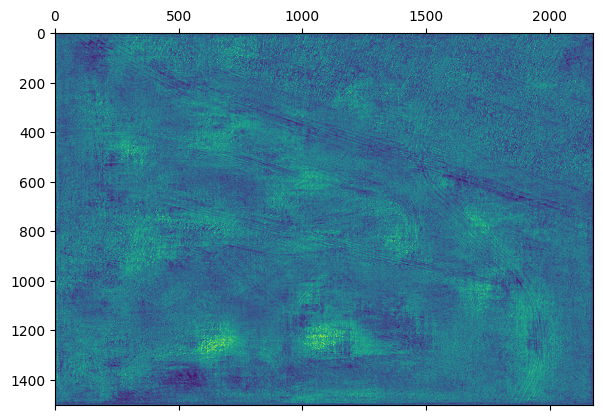

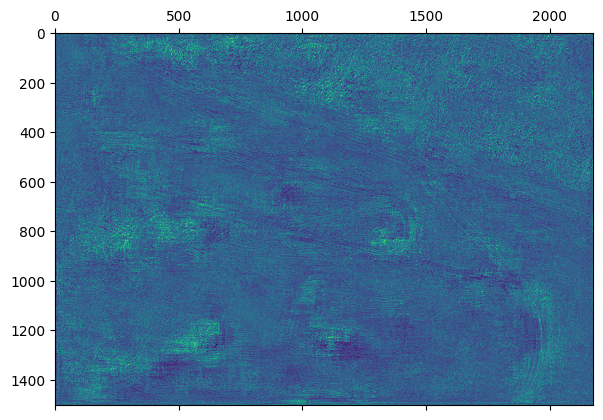

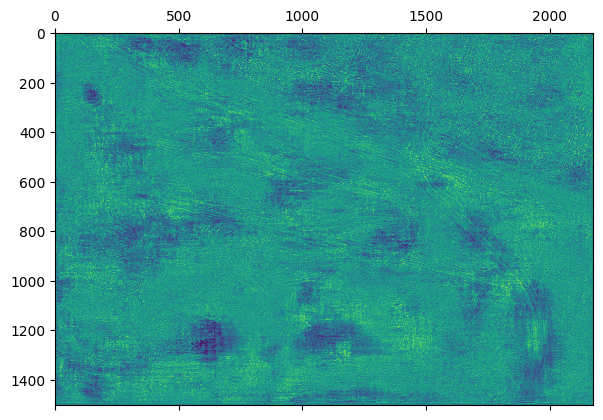

In [81]:
# plt.imshow(output_array, cmap='gray')
# plt.axis('off')
# plt.show()
plt.matshow(output_array[0, :, :])
plt.matshow(output_array[1, :, :])
plt.matshow(output_array[2, :, :])
plt.matshow(output_array[3, :, :])
plt.matshow(output_array[4, :, :])
plt.matshow(output_array[5, :, :])

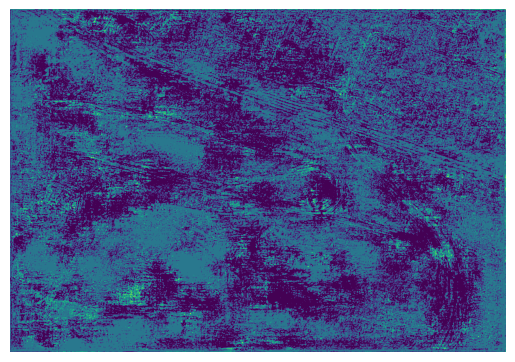

In [82]:
plt.imshow(class_output_array, cmap="viridis")
plt.axis("off")
plt.show()

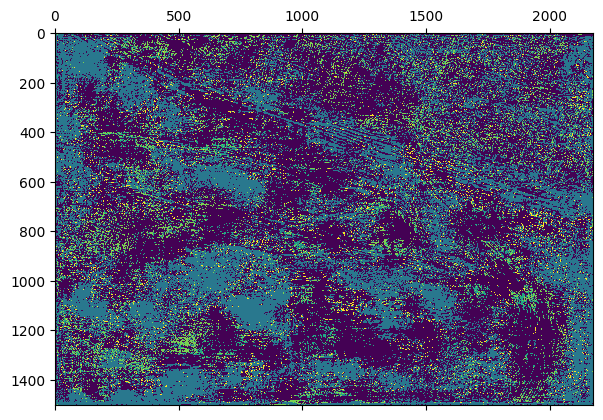

In [83]:
plt.matshow(class_output_array)

In [84]:
class_output_array

array([[1, 5, 2, ..., 5, 5, 5],
       [4, 4, 4, ..., 4, 5, 4],
       [0, 2, 2, ..., 2, 3, 3],
       ...,
       [0, 2, 2, ..., 0, 4, 4],
       [0, 2, 4, ..., 0, 4, 4],
       [0, 0, 0, ..., 4, 4, 4]], dtype=int64)

In [85]:
class_output_array.max()

5

In [86]:
class_output_array.min()

0

In [87]:
unique, counts = np.unique(class_output_array, return_counts=True)
print(dict(zip(unique, counts)))

{0: 1804305, 1: 7991, 2: 1091506, 3: 109590, 4: 176082, 5: 83230}
